In [43]:
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

In [44]:
data = pd.read_csv('cars.csv')
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.




# Duplicates rows finding


In [45]:
data.duplicated().sum()

0

# Missing values finding 


In [46]:
data.isnull().sum()

mpg            0
 cylinders     0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [47]:
data.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [48]:
data.dtypes

mpg            float64
 cylinders       int64
cubicinches     object
hp               int64
weightlbs       object
time-to-60       int64
year             int64
brand           object
dtype: object

# Slicing

In [49]:
X=data.iloc[:, 0:-1]
X

# data.iloc[:, 0:-1]
#           :, -> all rows
#              0:-1 -> All  columns except the last one
# this is the splitting of traiing data

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978
...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980
257,36.1,4,91,60,1800,16,1979
258,22.0,6,232,112,2835,15,1983
259,18.0,6,232,100,3288,16,1972


In [50]:
y = data.iloc[:, -1]
y

#  data.iloc[:, -1]
#            :, -> all rows
#               -1 -> only the last column


0           US.
1       Europe.
2           US.
3           US.
4           US.
         ...   
256         US.
257      Japan.
258         US.
259         US.
260         US.
Name: brand, Length: 261, dtype: object

In [51]:
X.shape
#  no of rows and columns 

(261, 7)

# fill null value with  mean...!

In [52]:
for column in X.columns:
    if X[column].dtype == object:
        try:
            X[column] = pd.to_numeric(X[column], errors='coerce')
            X[column] = X[column].fillna(X[column].mean())
        except ValueError:
            print(f"Column '{column}' cannot be converted to numeric, skipping.")



In [53]:
# print..!
for i in X.columns:
    X[i] = X[i].fillna(int(X[i].mean()))
for i in X.columns:
    print(X[i].isnull().sum())
 

0
0
0
0
0
0
0


# Using the elbow method to find  the optimal number of clusters

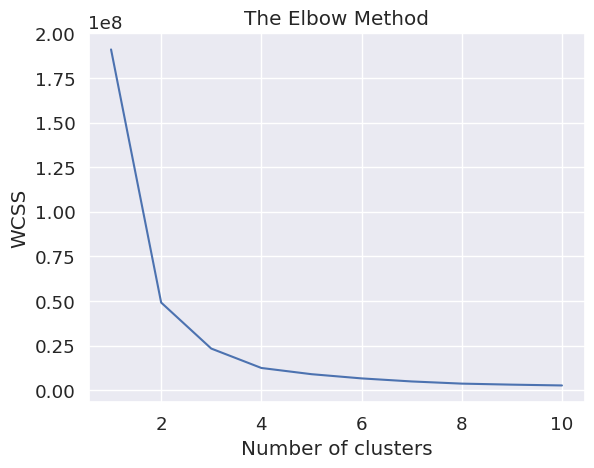

In [54]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# from The Elbow Method  K = 3 in this example


In [64]:
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)
y_kmeans


AttributeError: 'numpy.ndarray' object has no attribute 'values'

# value in y_kmeans[i] will be the class  of x[i]

In [56]:
X_array = X.values
X

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978
...,...,...,...,...,...,...,...
256,17.0,8,305.0,130,3840.0,15,1980
257,36.1,4,91.0,60,1800.0,16,1979
258,22.0,6,232.0,112,2835.0,15,1983
259,18.0,6,232.0,100,3288.0,16,1972


/home/administrator/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/administrator/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/administrator/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/administrator/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

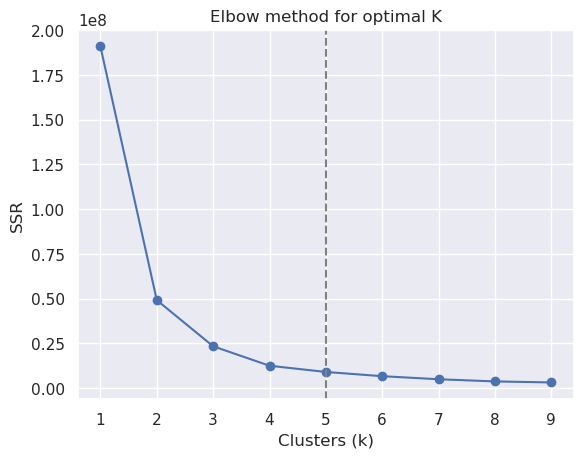

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
 
ks = range(1, 10)
 
ssr = []
# For each cluster K
for k in ks:
    # create model instance of K clusters
    model = KMeans(n_clusters=k)
 
    # fit the model
    model.fit(X)
 
    # append the inertial to a list
    ssr.append(model.inertia_)
     
# Plot
plt.plot(ks, ssr, '-o')
plt.xlabel('Clusters (k)')
plt.ylabel('SSR')
plt.xticks(ks)
plt.title('Elbow method for optimal K')
plt.axvline(x=5,linestyle='--',c='grey')
plt.show()